# Titanic Survival Prediction

This is the legendary introduction dataset!

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## 1. Import Data & Initial Lookup to the data

In [3]:
data = pd.read_csv('data/train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
def categorical_variables_unique_values(df):
    
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    return {col: df[col].unique() for col in categorical_columns}

# print(categorical_variables_unique_values(data))

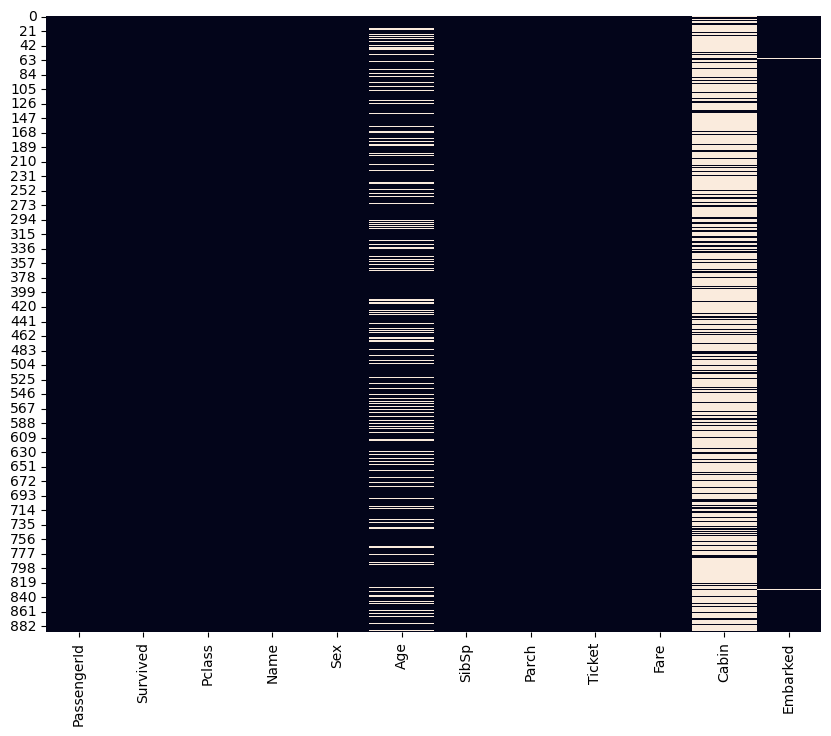

In [14]:
# Visualize null values
plt.figure(figsize=(10,8))

sns.heatmap(data.isnull(), cbar=False)

plt.show()

### Possible Approches

1. Fill `Age` with mean or median
2. Fill `Embarked` with mode
3. vanila approach: drop the null records

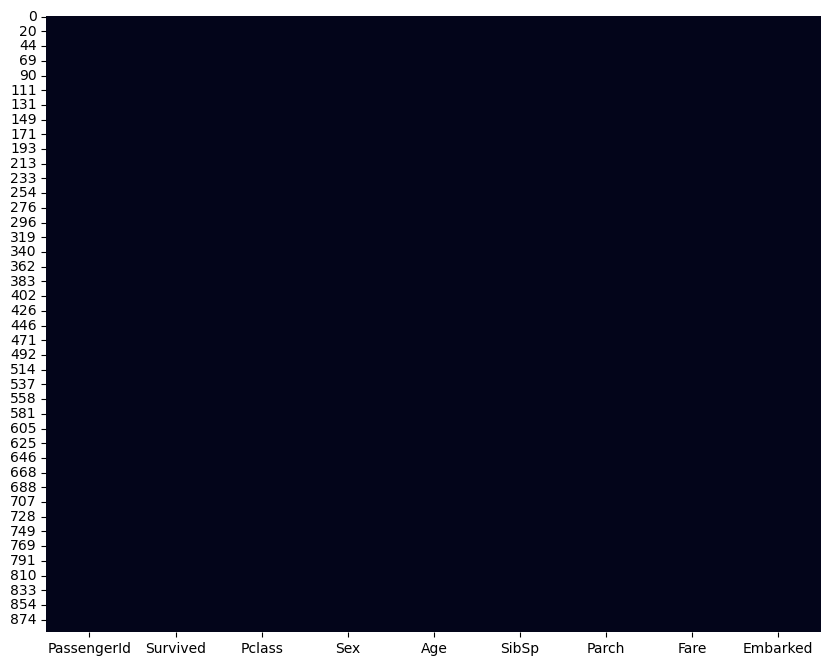

In [43]:
# Drop cabin column and then perform drop na

no_cabin_df = data.drop(columns=['Cabin', 'Name', 'Ticket'])

drop_na_df = no_cabin_df.dropna()

plt.figure(figsize=(10,8))

sns.heatmap(drop_na_df.isnull(), cbar=False)

plt.show()

## 2. Exploratory Data Analysis

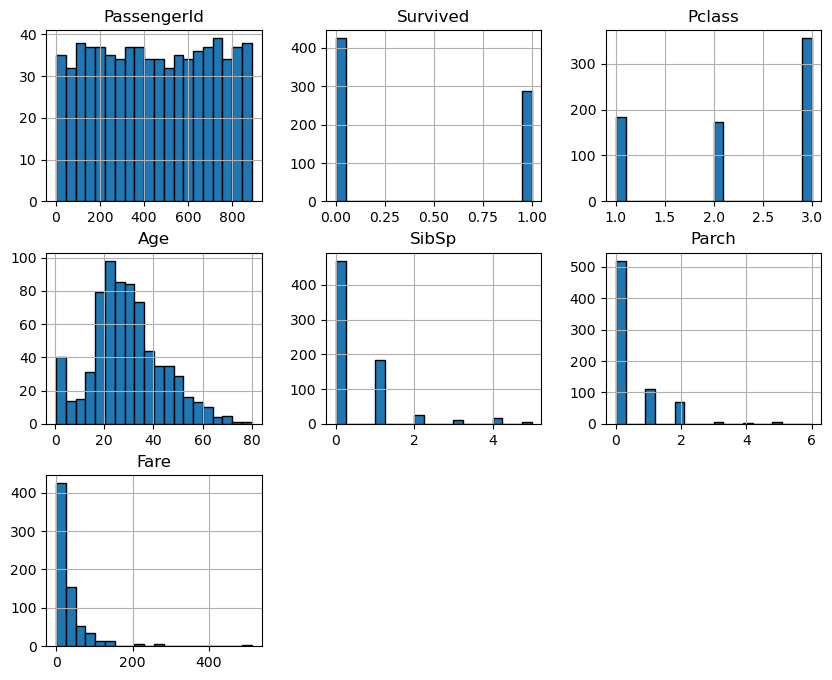

In [44]:
# 1. Histogram for all the continuous variables

drop_na_df.hist(figsize=(10,8), bins=20, edgecolor='black')

plt.show()

In [45]:
# Ordinal data into category column so that we can visualize it!
cat_col_convert_df = drop_na_df.copy()

cat_col_convert_df['Pclass_cat'] = cat_col_convert_df['Pclass'].astype(object)
cat_col_convert_df['SibSp_cat'] = cat_col_convert_df['SibSp'].astype(object)
cat_col_convert_df['Parch_cat'] = cat_col_convert_df['Parch'].astype(object)

cat_col_convert_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
 9   Pclass_cat   712 non-null    object 
 10  SibSp_cat    712 non-null    object 
 11  Parch_cat    712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [47]:
# Plotly Pie Chart of categorical values
def plot_categorical_pie_charts(df, nrows=None, ncols=None, title=None):
    
    # Check for the title
    if not title:
        title = "Categorical Columns Distribution"
    # Select categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # If nrows and ncols are not provided, default to a single column layout
    if nrows is None or ncols is None:
        nrows = len(categorical_cols)
        ncols = 1
    
    # Create subplots with the specified number of rows and columns
    fig = make_subplots(
        rows=nrows, 
        cols=ncols, 
        subplot_titles=categorical_cols[:nrows*ncols], 
        specs=[[{'type': 'domain'}] * ncols] * nrows
    )
    
    # Add pie charts to subplots
    for i, col in enumerate(categorical_cols):
        row = (i // ncols) + 1
        col_pos = (i % ncols) + 1
        value_counts = df[col].value_counts()
        fig.add_trace(
            go.Pie(labels=value_counts.index, values=value_counts.values, name=col),
            row=row, col=col_pos
        )
        if i >= nrows * ncols - 1:
            break

    # Update layout
    fig.update_layout(height=300 * nrows, title_text=title, showlegend=False)
    fig.show()

plot_categorical_pie_charts(cat_col_convert_df, 2, 3)

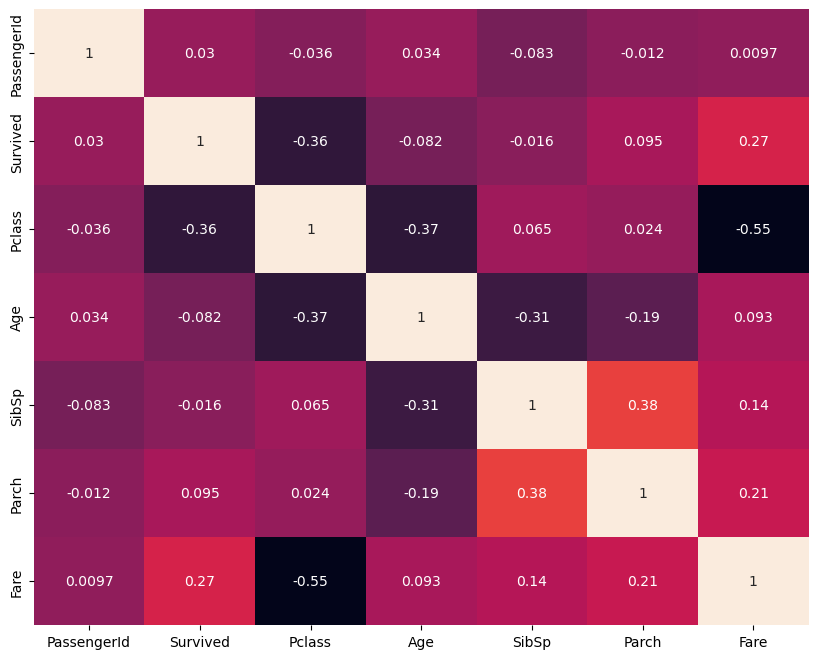

In [54]:
# Correlation Analysis!

numerical_df = drop_na_df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))

sns.heatmap(numerical_df.corr(), annot=True, cbar=False)

plt.show()

In [ ]:
# Next: Cramer's V for Categorical Features Correlation, One Hot Encoding & Vanila Model Prediction with Random Forest, Logistic Regression, SVM, and MLP